In [8]:
library(tidyverse)
library(tidymodels)

Building a Model to Predict the Quality of Red Wine 

Trushaan Bundhoo, Jennifer Chu, Mantra Patel, Maira Zaidi

Introduction 

Winemaking is a large global industry, with over 330 billion USD worth of wine sold in 2020. Cheap wine can be around 15 USD per bottle, with more expensive ones fetching 500 USD or more. Wine price is dictated partly by its quality, which is in turn linked to factors like sugar content, acidity, alcohol content, and many more. Since these dictate the flavor of red wine, we would like to ask: can citric acid levels, alcohol content, and sugar be used to predict the quality of wine? 

In [9]:
red<- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") 
red

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5
79,0.6,0.06,16,0.069,15,59,0.9964,33,0.46,94,5
73,0.65,0,12,0.065,15,21,0.9946,339,0.47,10,7
78,0.58,0.02,2,0.073,9,18,0.9968,336,0.57,95,7


Preliminatory Data Analysis 

For this model, we will be focusing on how citric acid, residual sugar, and alcohol content affect the rating of red wine. Below, we will select them and create our training and testing sets. 

In [10]:
red_data <- red |>
            mutate(quality = as_factor(quality))
colnames(red_data) <- make.names(colnames(red_data))

red_data_scaled<-red_data |>
                mutate(citric.acid=as.numeric(citric.acid)) |>
                mutate(scaled_citric_acid=scale(citric.acid,center=TRUE),
                        scaled_residual_sugar=scale(residual.sugar,center=TRUE),
                        scaled_alcohol=scale(alcohol,center=TRUE))

red_split<-initial_split(red_data_scaled, prop=0.75, strata=quality)
red_train<-training(red_split) 
red_test<-testing(red_split) 

red_train_set<-red_train |>
                select(c(citric.acid,residual.sugar,alcohol,scaled_citric_acid,scaled_residual_sugar,scaled_alcohol,quality))
red_test_set<-red_test |>
                select(c(citric.acid,residual.sugar,alcohol,scaled_citric_acid,scaled_residual_sugar,scaled_alcohol,quality))
red_train_set




citric.acid,residual.sugar,alcohol,scaled_citric_acid,scaled_residual_sugar,scaled_alcohol,quality
<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
0.00,26,98,-1.39103710,-0.01701753,-0.04317968,5
0.04,23,98,-1.18569949,-0.08800280,-0.04317968,5
0.00,18,94,-1.39103710,-0.20631160,-0.04317968,5
0.06,16,94,-1.08303069,-0.25363512,-0.04317968,5
0.08,18,92,-0.98036188,-0.20631160,-0.04317968,5
0.36,61,105,0.45700139,0.81114405,-0.04317968,5
0.00,16,99,-1.39103710,-0.25363512,-0.04317968,5
0.18,38,92,-0.46701786,0.26692358,-0.04317968,5
0.31,23,97,0.20032938,-0.08800280,-0.04317968,5


In [11]:
counts<-red_train_set |>
        group_by(quality) |>
        summarize(n=n())
counts

counts_sugar<-red_train_set |>
        group_by(residual.sugar, quality) |>
        summarize(n=n())
counts_sugar

quality,n
<fct>,<int>
3,6
4,43
5,508
6,481
7,147
8,13


`summarise()` has grouped output by 'residual.sugar'. You can override using
the `.groups` argument.


residual.sugar,quality,n
<dbl>,<fct>,<int>
2,4,5
2,5,51
2,6,45
2,7,8
2,8,2
3,5,11
3,6,7
3,7,1
4,5,1


The two tables, generated from our training set, provide some more insight about the wrangled data. The "counts" table provides the number of red wines that were given a particular rating, with most of the wines being rated a 5/8. The "counts_sugar" table is longer, and shows the ratings that were given to wines based on their residual sugar content. We could potentially do the same with citric acid or alcohol content, but the wider value range would lengthen the table even more. Instead, can plots help us better visualize any relationships between our 3 variables and the quality rating.


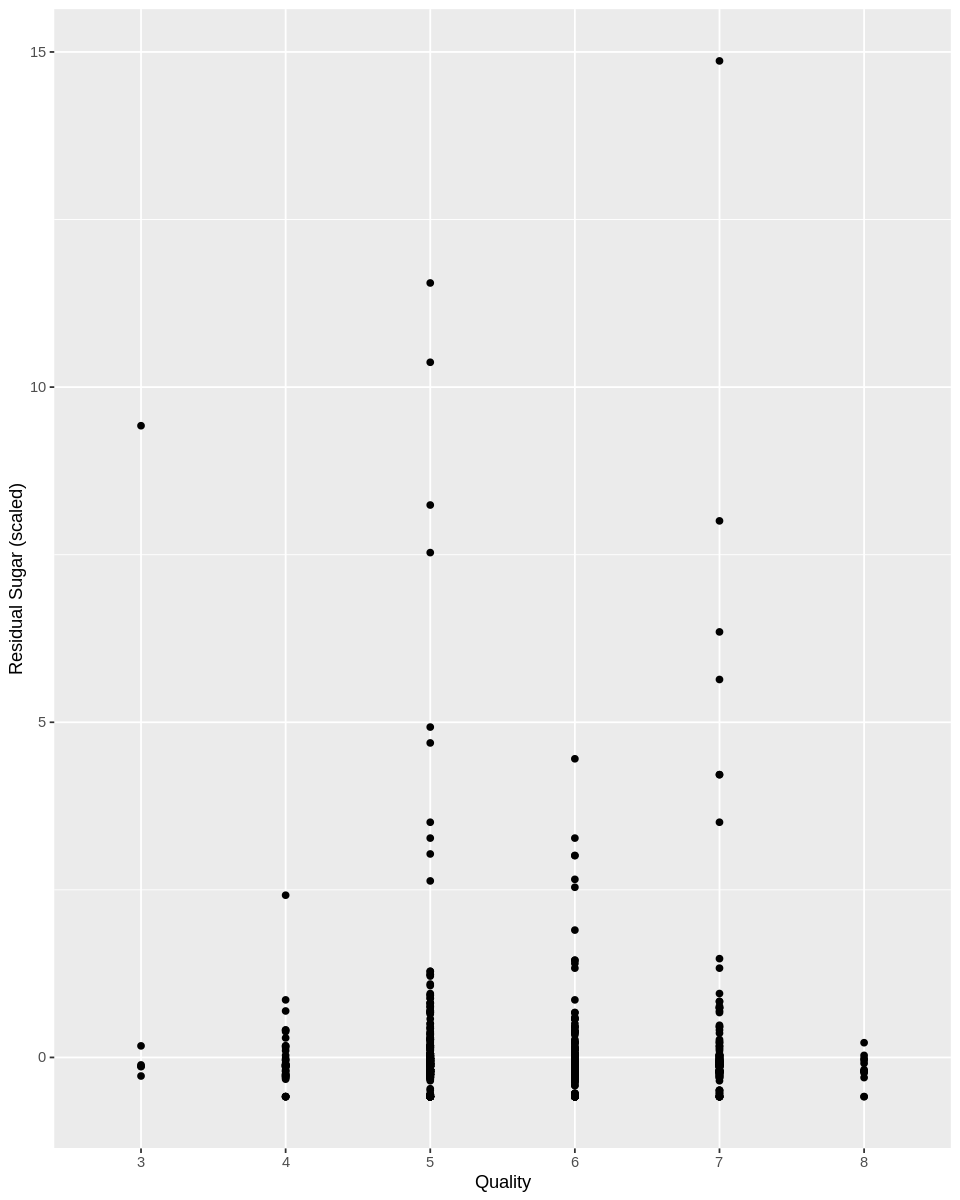

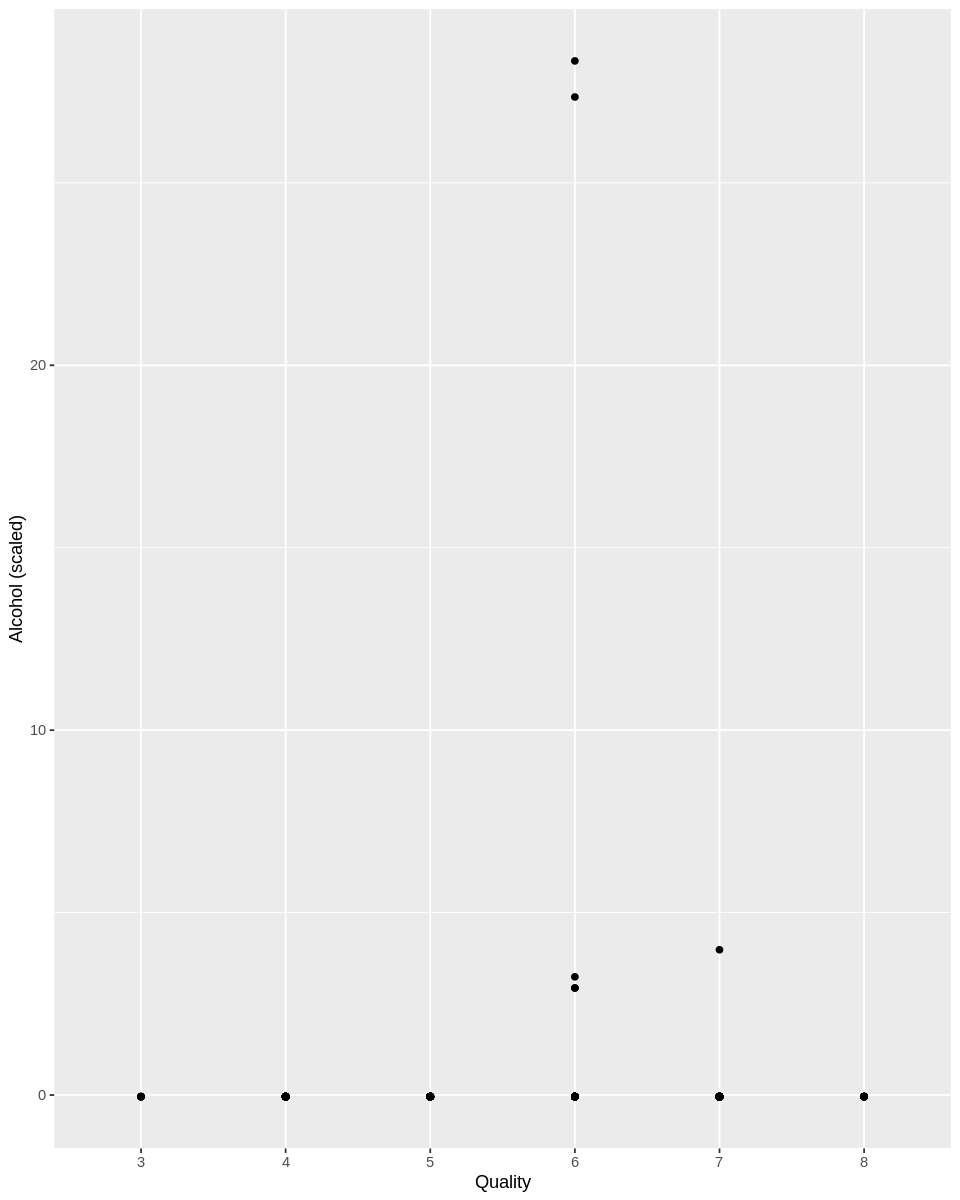

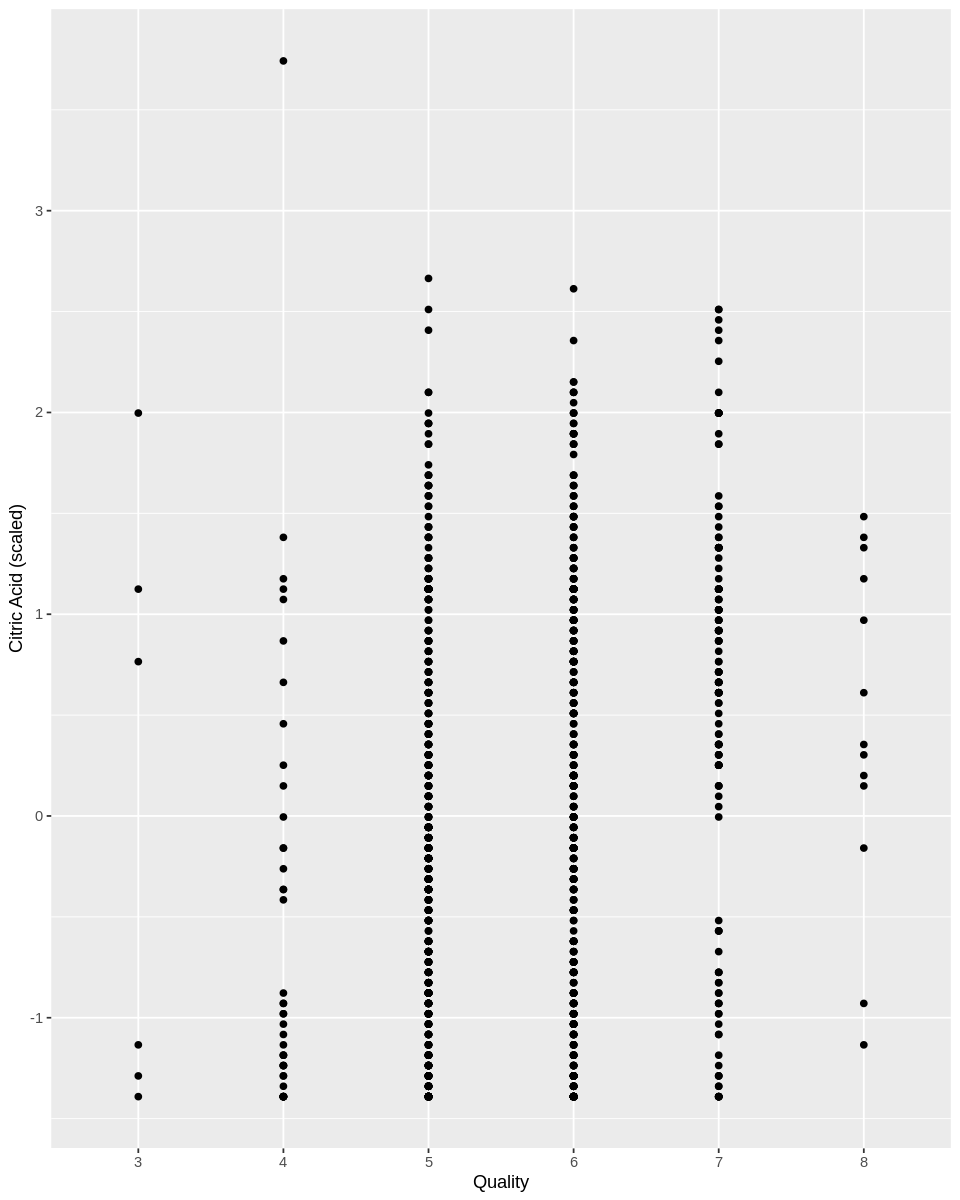

In [12]:
options(repr.plot.width = 8, repr.plot.height = 10)
sugar_plot <- ggplot(red_train_set, aes(x= quality, y=scaled_residual_sugar)) + geom_point() +xlab("Quality") + ylab("Residual Sugar (scaled)")
alcohol_plot <- ggplot(red_train_set, aes(x= quality, y=scaled_alcohol)) + geom_point() +xlab("Quality") + ylab("Alcohol (scaled)")
citric_acid_plot <- ggplot(red_train_set, aes(x= quality, y=scaled_citric_acid)) + geom_point() +xlab("Quality") + ylab("Citric Acid (scaled)")
sugar_plot
alcohol_plot
citric_acid_plot

The above plots reveal many things to us. The sugar plot shows that the majority of the wines have a sugar content between 0 and 100, regardless of their quality rating. The alcohol plot is not much help when it comes to finding relationships, due to the wide range in alcohol content found within the wines. The citric acid plot shows that for wines within a given rating, there is a wide range of possible citric acid values. Given the drastic differences between plots, we hope that the interplay between these 3 factors can form the basis for a robust classification model. 

Methods

We will use values from acidity, sugar, and alcohol in winemaking to build a predictive model that can determine the quality rating for a given red wine. We plan to use a K-nn classification model, using nearest neighbors for citric acid, alcohol, and residual sugar to predict the wine quality. The K for such an analysis will not be determine arbitrarily, but the K-nn model will be tested and tuned to find the best K to give the best prediction. The model will then be applied to the testing set, to see if our predictive model holds true for unseen data. 

Expected Outcomes

Based on what we saw from the exploratory tables and visualizations, we are hoping that the model we build will be able to accurately predict wine quality. Human taste is ultimately the key aspect of determining whether or not a wine is high quality, but if quality can be predicted by chemical properties alone, that could lead to breakthroughs in the winemaking industry. If successful, such a predictive model can have large implications in the industry, as the information could be used by winemakers to understand how they can produce higher quality wine, and rake in more profit. This could lead to the integration of modern chemical techniques and chemical engineering with winemaking
to revolutionize a craft that has been around for thousands of years. 

In [ ]:
b